In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df_path = '/content/gdrive/MyDrive/StudyData/seeds_dataset.csv'
df = pd.read_csv(df_path,sep='\t')
df.head()

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,Assymmetry,LengthOfGroove,ClassID
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.describe()

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,Assymmetry,LengthOfGroove,ClassID
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [6]:
df['ClassID'].unique()

array([1, 2, 3])

In [7]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'LengthOfKernel', 'WidthOfKernel',
       'Assymmetry', 'LengthOfGroove', 'ClassID'],
      dtype='object')

In [8]:
class_names_dict = {1:'Kama Wheat',2:'Rosa Wheat',3:'Canadian Wheat'}
df['ClassName'] = df['ClassID'].map(class_names_dict)

In [9]:
df.head(5)

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,Assymmetry,LengthOfGroove,ClassID,ClassName
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama Wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama Wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama Wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama Wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama Wheat


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            210 non-null    float64
 1   Perimeter       210 non-null    float64
 2   Compactness     210 non-null    float64
 3   LengthOfKernel  210 non-null    float64
 4   WidthOfKernel   210 non-null    float64
 5   Assymmetry      210 non-null    float64
 6   LengthOfGroove  210 non-null    float64
 7   ClassID         210 non-null    int64  
 8   ClassName       210 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 14.9+ KB


In [11]:
X_neib = df[['WidthOfKernel','LengthOfGroove']].values

In [12]:
df[['WidthOfKernel','LengthOfGroove']].describe()

,WidthOfKernel,LengthOfGroove
count,210.000000,210.000000
mean,3.258605,5.408071
std,0.377714,0.491480
min,2.630000,4.519000
25%,2.944000,5.045000
50%,3.237000,5.223000
75%,3.561750,5.877000
max,4.033000,6.550000


In [13]:
X_neib

array([[3.312, 5.22 ],
       [3.333, 4.956],
       [3.337, 4.825],
       [3.379, 4.805],
       [3.562, 5.175],
       [3.312, 4.956],
       [3.259, 5.219],
       [3.302, 5.   ],
       [3.465, 5.877],
       [3.505, 5.533],
       [3.242, 5.314],
       [3.201, 5.001],
       [3.199, 4.738],
       [3.156, 4.872],
       [3.114, 4.825],
       [3.333, 4.781],
       [3.383, 4.781],
       [3.514, 5.046],
       [3.466, 4.649],
       [3.049, 4.914],
       [3.129, 5.176],
       [3.168, 5.219],
       [3.507, 5.091],
       [2.936, 4.961],
       [3.245, 5.001],
       [3.421, 5.307],
       [3.026, 4.825],
       [2.956, 4.869],
       [3.221, 5.038],
       [3.065, 5.097],
       [2.975, 5.056],
       [3.371, 5.228],
       [3.186, 5.299],
       [3.15 , 5.012],
       [3.328, 5.36 ],
       [3.485, 5.443],
       [3.464, 5.527],
       [3.683, 5.484],
       [3.288, 5.309],
       [3.298, 5.001],
       [3.156, 5.178],
       [3.158, 5.176],
       [3.201, 4.783],
       [3.3

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_neib_std = scaler.fit_transform(X_neib)

In [15]:
X_neib_std

array([[ 1.41701823e-01, -3.83577423e-01],
       [ 1.97432229e-01, -9.22013487e-01],
       [ 2.08047544e-01, -1.18919199e+00],
       [ 3.19508356e-01, -1.22998260e+00],
       [ 8.05159035e-01, -4.75356297e-01],
       [ 1.41701823e-01, -9.22013487e-01],
       [ 1.04889426e-03, -3.85616954e-01],
       [ 1.15163535e-01, -8.32274143e-01],
       [ 5.47737637e-01,  9.56394144e-01],
       [ 6.53890791e-01,  2.54795637e-01],
       [-4.40661961e-02, -1.91861552e-01],
       [-1.52873179e-01, -8.30234612e-01],
       [-1.58180837e-01, -1.36663115e+00],
       [-2.72295477e-01, -1.09333405e+00],
       [-3.83756288e-01, -1.18919199e+00],
       [ 1.97432229e-01, -1.27893133e+00],
       [ 3.30123671e-01, -1.27893133e+00],
       [ 6.77775250e-01, -7.38455738e-01],
       [ 5.50391466e-01, -1.54814936e+00],
       [-5.56255164e-01, -1.00767377e+00],
       [-3.43948856e-01, -4.73316767e-01],
       [-2.40449531e-01, -3.85616954e-01],
       [ 6.59198448e-01, -6.46676863e-01],
       [-8.

In [16]:
y=df['ClassName']
y

0          Kama Wheat
1          Kama Wheat
2          Kama Wheat
3          Kama Wheat
4          Kama Wheat
            ...      
205    Canadian Wheat
206    Canadian Wheat
207    Canadian Wheat
208    Canadian Wheat
209    Canadian Wheat
Name: ClassName, Length: 210, dtype: object

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import neighbors
from sklearn.inspection import DecisionBoundaryDisplay

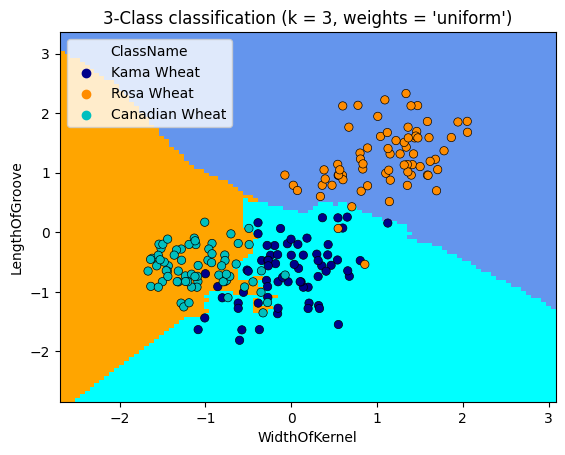

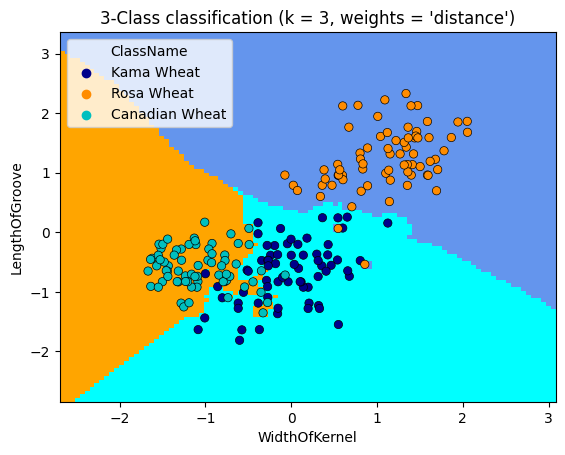

In [18]:
n_neighbors = 3
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = [ "darkblue" ,"darkorange", "c"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_neib_std, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_neib_std,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='WidthOfKernel',
        ylabel='LengthOfGroove',
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X_neib_std[:, 0],
        y=X_neib_std[:, 1],
        hue=y,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

In [19]:
neib_clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(X_neib_std, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [20]:
input_width = 3.5
input_length_of_groove = 5
input_arr = np.array([input_width, input_length_of_groove])
input_arr_std = scaler.transform(input_arr.reshape(1, -1))
print(input_arr_std)

[[ 0.64062165 -0.83227414]]


In [21]:
y_pred = clf.predict(input_arr_std)
print(y_pred)

['Kama Wheat']


In [22]:
original_values = scaler.inverse_transform(input_arr_std)
original_values

array([[3.5, 5. ]])

In [23]:
df['ClassName'].value_counts()

Kama Wheat        70
Rosa Wheat        70
Canadian Wheat    70
Name: ClassName, dtype: int64

In [24]:
X_tree_2features = df[['Area','LengthOfGroove']]
y = df['ClassName']

In [25]:
from sklearn.model_selection import train_test_split
X_train_2features, X_test_2features, y_train_2features, y_test_2features = train_test_split(X_tree_2features, y, test_size = 0.3,random_state=1)

In [26]:
print(f'Original set size: {X_tree_2features.shape}')
print(f'Training set size: {X_train_2features.shape}')
print(f'Test set size: {X_test_2features.shape}')


Original set size: (210, 2)
Training set size: (147, 2)
Test set size: (63, 2)


In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_max_depth = 5
tree_model_2features = DecisionTreeClassifier(max_depth=tree_max_depth) #, min_samples_split=10
tree_model_2features.fit(X_train_2features,y_train_2features)

DecisionTreeClassifier(max_depth=5)

In [28]:
y_pred_tree_2features = tree_model_2features.predict(X_test_2features)

In [29]:
print(y_pred_tree_2features)

['Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Kama Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Rosa Wheat' 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Kama Wheat'
 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Canadian Wheat' 'Canadian Wheat' 'Canadian Wheat' 'Canadian Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Rosa Wheat']


In [30]:
print(np.array(y_test_2features))

['Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Kama Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Kama Wheat' 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Kama Wheat'
 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat' 'Kama Wheat'
 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Kama Wheat' 'Kama Wheat'
 'Canadian Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Rosa Wheat']


In [31]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true = y_test_2features, y_pred=y_pred_tree_2features)
print(conf_matrix)

[[21  0  0]
 [ 3 20  1]
 [ 0  0 18]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test_2features, y_pred=y_pred_tree_2features))

                precision    recall  f1-score   support

Canadian Wheat       0.88      1.00      0.93        21
    Kama Wheat       1.00      0.83      0.91        24
    Rosa Wheat       0.95      1.00      0.97        18

      accuracy                           0.94        63
     macro avg       0.94      0.94      0.94        63
  weighted avg       0.94      0.94      0.94        63



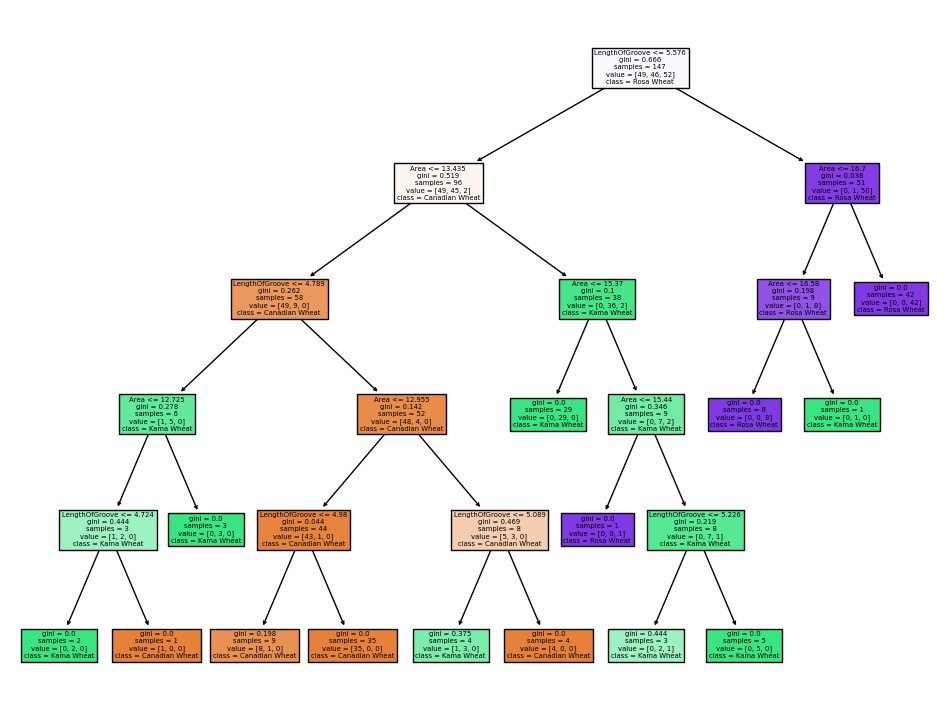

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt

class_names =['Canadian Wheat','Kama Wheat','Rosa Wheat']

plt.figure(figsize=(12,9))
tree.plot_tree(tree_model_2features,feature_names=X_tree_2features.columns, class_names=class_names, filled = True)

plt.show()
#plt.savefig('/content/gdrive/MyDrive/StudyData/seed_classifer_tree_model.png')

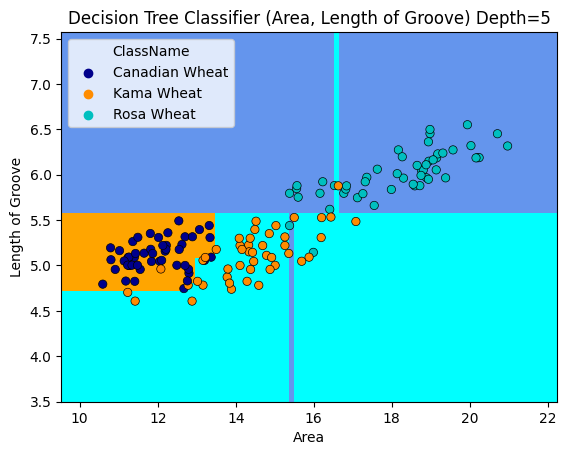

In [34]:
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = [ "darkblue" ,"darkorange", "c"]
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        tree_model_2features,
        X_tree_2features,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='Area',
        ylabel='Length of Groove',
        shading="auto",
    )
# Plot also the training points
sns.scatterplot(
        x=X_train_2features.values[:, 0],
        y=X_train_2features.values[:, 1],
        hue=y_train_2features,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.title(f"Decision Tree Classifier (Area, Length of Groove) Depth={tree_max_depth}")

plt.show()

In [35]:
X_tree_5features = df[['Area','WidthOfKernel','Compactness','Perimeter','LengthOfGroove']]
y = df['ClassName']

In [36]:
from sklearn.model_selection import train_test_split
X_train_5features, X_test_5features, y_train_5features, y_test_5features = train_test_split(X_tree_5features, y, test_size = 0.3,random_state=1)

In [37]:
print(f'Original set size: {X_tree_5features.shape}')
print(f'Training set size: {X_train_5features.shape}')
print(f'Test set size: {X_test_5features.shape}')


Original set size: (210, 5)
Training set size: (147, 5)
Test set size: (63, 5)


In [38]:
from sklearn.tree import DecisionTreeClassifier
tree_model_5features = DecisionTreeClassifier(max_depth=5)
tree_model_5features.fit(X_train_5features,y_train_5features)

DecisionTreeClassifier(max_depth=5)

In [39]:
y_pred_tree_5features = tree_model_5features.predict(X_test_5features)

In [40]:
print(y_pred_tree_5features)

['Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Kama Wheat' 'Kama Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Kama Wheat' 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Kama Wheat'
 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Canadian Wheat' 'Canadian Wheat' 'Canadian Wheat' 'Canadian Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Rosa Wheat']


In [41]:
print(np.array(y_test_5features))

['Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Kama Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Kama Wheat' 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Kama Wheat'
 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat' 'Kama Wheat'
 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Kama Wheat' 'Kama Wheat'
 'Canadian Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Rosa Wheat']


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test_5features, y_pred=y_pred_tree_5features))

                precision    recall  f1-score   support

Canadian Wheat       0.88      1.00      0.93        21
    Kama Wheat       0.95      0.88      0.91        24
    Rosa Wheat       1.00      0.94      0.97        18

      accuracy                           0.94        63
     macro avg       0.94      0.94      0.94        63
  weighted avg       0.94      0.94      0.94        63



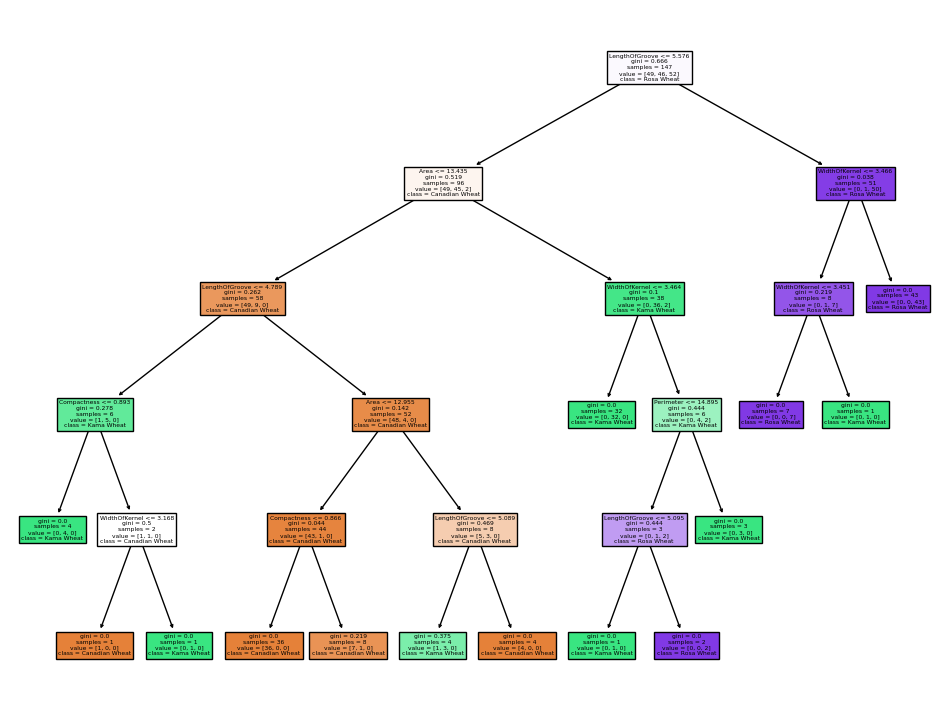

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

class_names =['Canadian Wheat','Kama Wheat','Rosa Wheat']

plt.figure(figsize=(12,9))
tree.plot_tree(tree_model_5features,feature_names=X_tree_5features.columns, class_names=class_names, filled = True)

plt.show()
#plt.savefig('/content/gdrive/MyDrive/StudyData/seed_classifer_tree_model.png')

In [44]:
#['Area','WidthOfKernel','Compactness','Perimeter','LengthOfGroove']
seed_area = 17.7
seed_width_of_kernel = 3.6
seed_compactness = 0.85
seed_perimeter = 16
seed_length_of_groove = 6
one_seed = np.array([seed_area,seed_width_of_kernel,seed_compactness,seed_perimeter,seed_length_of_groove])
predicted_label = tree_model_5features.predict(one_seed.reshape(1,-1))
print('Predicted Class: ', predicted_label[0])

Predicted Class:  Rosa Wheat


In [45]:
tree_model_5features.feature_importances_

array([0.34385193, 0.04315436, 0.00920675, 0.01409033, 0.58969663])

In [46]:
feature_importances_tree_df = pd.DataFrame(tree_model_5features.feature_importances_,
                                           columns=['Importance'],
                                           index = X_tree_5features.columns).sort_values('Importance', ascending=True)

In [47]:
feature_importances_tree_df.head()

,Importance
Compactness,0.009207
Perimeter,0.014090
WidthOfKernel,0.043154
Area,0.343852
LengthOfGroove,0.589697


<Axes: >

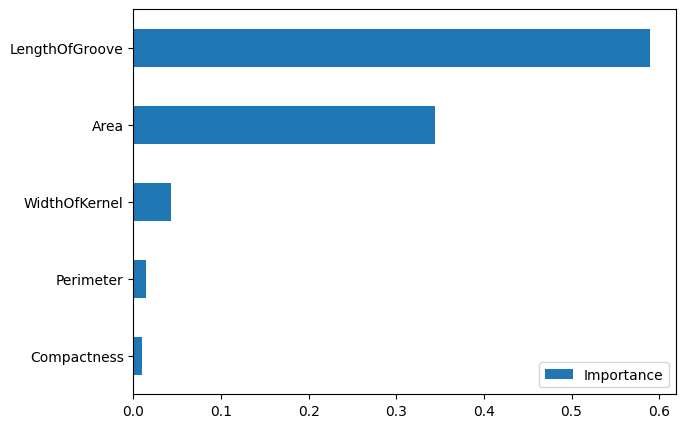

In [48]:
feature_importances_tree_df.plot.barh(figsize=(7,5))

In [49]:
y_pred_tree_probs = tree_model_5features.predict_proba(X_test_5features)

In [50]:
X_test_5features.shape

(63, 5)

In [51]:
y_pred_tree_probs.shape

(63, 3)

In [52]:
y_pred_tree_probs

array([[0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.875, 0.125, 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.

In [53]:
#feature_importances_tree_df.to_excel('/content/gdrive/MyDrive/StudyData/seed_feature_importance.xlsx',
#                                     sheet_name='importances')

In [54]:
X = df.drop(['ClassID','ClassName'],axis=1)
y = df['ClassName']

In [55]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)

In [56]:
X_scaled

array([[0.44098206, 0.50206612, 0.5707804 , ..., 0.48610121, 0.18930164,
        0.34515017],
       [0.40509915, 0.44628099, 0.66243194, ..., 0.50106914, 0.03288302,
        0.21516494],
       [0.34938621, 0.34710744, 0.87931034, ..., 0.50392017, 0.25145302,
        0.1506647 ],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , ..., 0.42908054, 0.98166664,
        0.26440177],
       [0.11803588, 0.16528926, 0.39927405, ..., 0.14682823, 0.36834441,
        0.25849335],
       [0.16147309, 0.19214876, 0.54718693, ..., 0.24518888, 0.63346292,
        0.26784835]])

In [57]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3,random_state=1)

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(C=0.1)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1)

In [59]:
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

In [60]:
print(np.array(y_test))

['Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Kama Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Canadian Wheat' 'Kama Wheat' 'Kama Wheat'
 'Kama Wheat' 'Kama Wheat' 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Kama Wheat'
 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Kama Wheat'
 'Kama Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat' 'Kama Wheat'
 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Canadian Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Canadian Wheat' 'Rosa Wheat'
 'Canadian Wheat' 'Rosa Wheat' 'Rosa Wheat' 'Kama Wheat' 'Kama Wheat'
 'Canadian Wheat' 'Canadian Wheat' 'Kama Wheat' 'Canadian Wheat'
 'Rosa Wheat' 'Kama Wheat' 'Rosa Wheat']


In [61]:
y_pred_log_reg

array(['Kama Wheat', 'Canadian Wheat', 'Rosa Wheat', 'Canadian Wheat',
       'Rosa Wheat', 'Rosa Wheat', 'Kama Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Rosa Wheat', 'Kama Wheat',
       'Kama Wheat', 'Kama Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Kama Wheat', 'Kama Wheat', 'Kama Wheat',
       'Kama Wheat', 'Kama Wheat', 'Rosa Wheat', 'Canadian Wheat',
       'Kama Wheat', 'Canadian Wheat', 'Kama Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Rosa Wheat', 'Rosa Wheat', 'Rosa Wheat',
       'Rosa Wheat', 'Kama Wheat', 'Kama Wheat', 'Rosa Wheat',
       'Canadian Wheat', 'Rosa Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Rosa Wheat', 'Canadian Wheat',
       'Rosa Wheat', 'Rosa Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Rosa Wheat', 'Canadian Wheat', 'Rosa Wheat', 'Canadian Wheat',
       'Rosa Wheat', 'Rosa Wheat', 'Canadian Wheat', 'Kama Wheat',
       'Canadian Wheat', '

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred_log_reg))

                precision    recall  f1-score   support

Canadian Wheat       0.75      1.00      0.86        21
    Kama Wheat       1.00      0.62      0.77        24
    Rosa Wheat       0.90      1.00      0.95        18

      accuracy                           0.86        63
     macro avg       0.88      0.88      0.86        63
  weighted avg       0.89      0.86      0.85        63



In [63]:
X.columns

Index(['Area', 'Perimeter', 'Compactness', 'LengthOfKernel', 'WidthOfKernel',
       'Assymmetry', 'LengthOfGroove'],
      dtype='object')

In [64]:
log_reg_model.coef_

array([[-0.6014672 , -0.58876855, -0.44008686, -0.48335634, -0.62241467,
         0.45591743, -0.21674075],
       [-0.05831298, -0.07247156,  0.27209977, -0.10074517,  0.04487055,
        -0.56356838, -0.47539792],
       [ 0.65978018,  0.66124012,  0.16798708,  0.58410152,  0.57754412,
         0.10765095,  0.69213866]])

<Axes: >

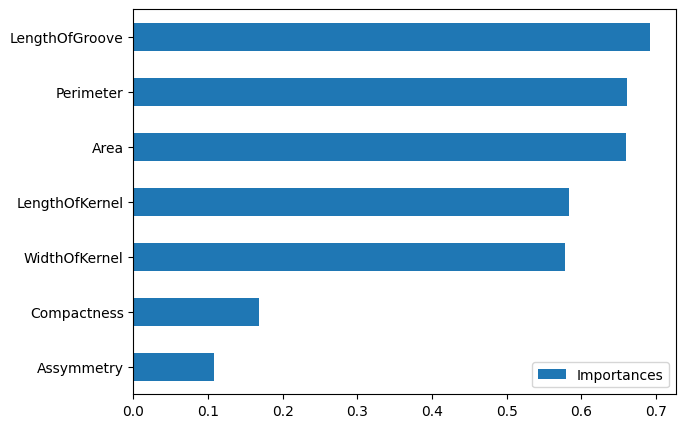

In [65]:
#Canadian Wheat - Coefficients[0]
#Kama Wheat - Coefficients[1]
#Rosa Wheat - Coefficients[2]


coef_0 = log_reg_model.coef_[2]
feature_importances_log_reg_0_df = pd.DataFrame(coef_0,
                                           columns=['Importances'],
                                           index = X.columns).sort_values('Importances', ascending=True)
feature_importances_log_reg_0_df.plot.barh(figsize=(7,5))

In [66]:
coef_0

array([0.65978018, 0.66124012, 0.16798708, 0.58410152, 0.57754412,
       0.10765095, 0.69213866])

In [67]:
df_2Classes = df#[(df['ClassName']=='Rosa Wheat')|(df['ClassName']=='Canadian Wheat')]

In [68]:
df_rosa = df[df['ClassName']=='Rosa Wheat']
df_rosa = df_rosa.drop(['ClassID'],axis=1)

<Axes: >

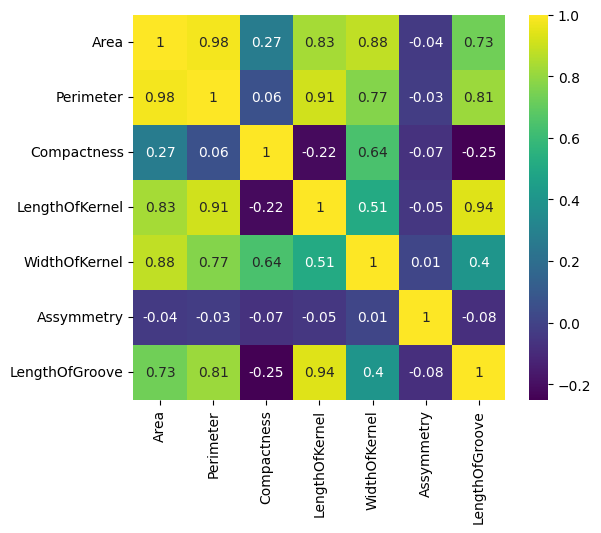

In [69]:
plt.figure(figsize=(6,5))
sns.heatmap(round(df_rosa.corr(),2),annot=True,cmap='viridis')

In [70]:
df_2Classes['ClassName'].unique()

array(['Kama Wheat', 'Rosa Wheat', 'Canadian Wheat'], dtype=object)

In [71]:
X = df_2Classes[['Area','LengthOfGroove']]#.drop(['ClassID','ClassName'],axis=1)
y = df_2Classes['ClassName']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [73]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [74]:
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_svm))

                precision    recall  f1-score   support

Canadian Wheat       0.80      0.92      0.86        13
    Kama Wheat       0.94      0.79      0.86        19
    Rosa Wheat       0.91      1.00      0.95        10

      accuracy                           0.88        42
     macro avg       0.88      0.90      0.89        42
  weighted avg       0.89      0.88      0.88        42



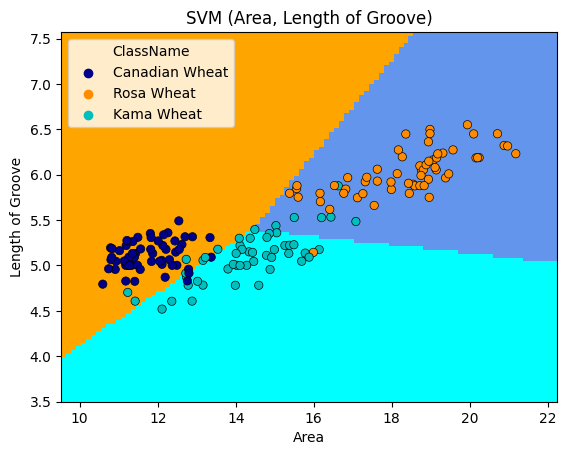

In [75]:
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = [ "darkblue" ,"darkorange", "c"]
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        svm_model,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='Area',
        ylabel='Length of Groove',
        shading="auto",
    )
# Plot also the training points
sns.scatterplot(
        x=X_train.values[:, 0],
        y=X_train.values[:, 1],
        hue=y_train,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.title(f"SVM (Area, Length of Groove)")

plt.show()

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 75, max_depth=9, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=75, n_jobs=-1)

In [77]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_rf))

                precision    recall  f1-score   support

Canadian Wheat       0.85      0.85      0.85        13
    Kama Wheat       0.85      0.89      0.87        19
    Rosa Wheat       1.00      0.90      0.95        10

      accuracy                           0.88        42
     macro avg       0.90      0.88      0.89        42
  weighted avg       0.88      0.88      0.88        42



In [78]:
#tree_0 = rf_model.estimators_[0]

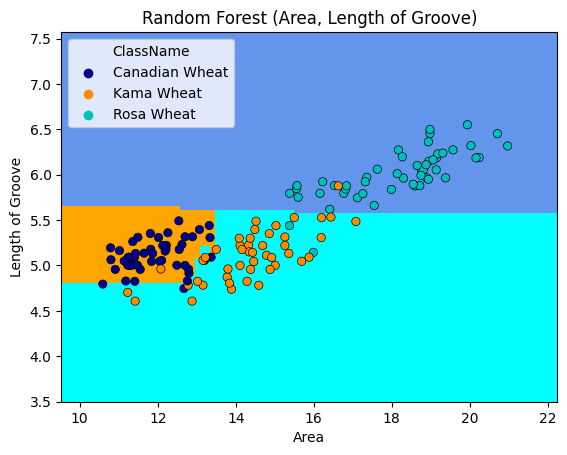

In [79]:
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = [ "darkblue" ,"darkorange", "c"]
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        rf_model,
        X_train,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='Area',
        ylabel='Length of Groove',
        shading="auto",
    )
# Plot also the training points
sns.scatterplot(
        x=X_train_2features.values[:, 0],
        y=X_train_2features.values[:, 1],
        hue=y_train_2features,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.title(f"Random Forest (Area, Length of Groove)")

plt.show()

<Axes: >

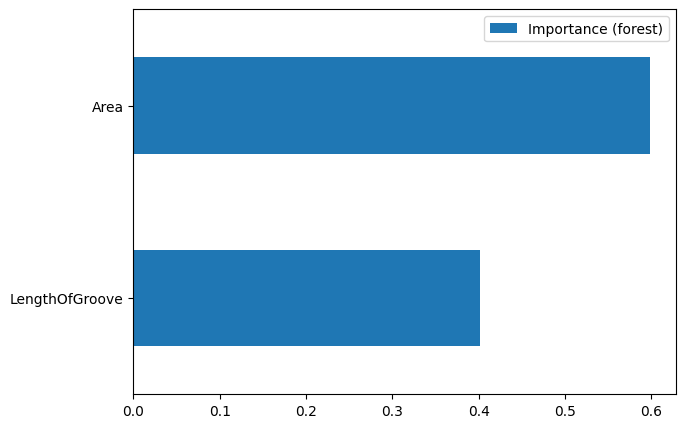

In [80]:
feature_importances_rf_df = pd.DataFrame(rf_model.feature_importances_,
                                           columns=['Importance (forest)'],
                                           index = X.columns).sort_values('Importance (forest)', ascending=True)
feature_importances_rf_df.plot.barh(figsize=(7,5))

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [3, 5, 7, 9, 11, 13, 15, 17, 19], 'max_depth':[2, 3, 4]}
model1 = RandomForestClassifier()
gridForest = GridSearchCV(estimator=model1, param_grid=parameters)
gridForest.fit(X_train, y_train)
print('Best score:', round(gridForest.best_score_,3))
print('Best model:', gridForest.best_estimator_)

Best score: 0.929
Best model: RandomForestClassifier(max_depth=4, n_estimators=7)


In [82]:
best_forest = gridForest.best_estimator_
y_pred_rf = best_forest.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_rf))

                precision    recall  f1-score   support

Canadian Wheat       0.90      0.69      0.78        13
    Kama Wheat       0.78      0.95      0.86        19
    Rosa Wheat       1.00      0.90      0.95        10

      accuracy                           0.86        42
     macro avg       0.89      0.85      0.86        42
  weighted avg       0.87      0.86      0.86        42



In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
model2 = LogisticRegression(max_iter=1000)
gridLogReg = GridSearchCV(estimator=model2, param_grid=parameters)
gridLogReg.fit(X_train, y_train)
print('Best score:', round(gridLogReg.best_score_,3))
print('Best model:', gridLogReg.best_estimator_)

Best score: 0.934
Best model: LogisticRegression(C=10.0, max_iter=1000)


In [84]:
gridLogReg.best_params_

{'C': 10.0}

In [85]:
best_log_reg_model = gridLogReg.best_estimator_

In [86]:
y_pred_proba_best_log_reg = best_log_reg_model.predict_proba(X_train)

In [87]:
y_pred_proba_best_log_reg

array([[2.42696850e-01, 7.55396018e-01, 1.90713234e-03],
       [1.27399045e-06, 1.49579442e-03, 9.98502932e-01],
       [9.80225554e-01, 1.97583684e-02, 1.60773555e-05],
       [2.38170201e-02, 9.76132821e-01, 5.01584626e-05],
       [9.94932501e-01, 5.06478374e-03, 2.71498674e-06],
       [3.64031394e-11, 5.23246264e-05, 9.99947675e-01],
       [4.85464069e-08, 9.00178584e-04, 9.99099773e-01],
       [9.39100514e-01, 6.08958493e-02, 3.63712958e-06],
       [1.41032516e-07, 2.60434130e-03, 9.97395518e-01],
       [4.48785766e-04, 4.84161813e-01, 5.15389402e-01],
       [2.46562435e-02, 9.66046259e-01, 9.29749788e-03],
       [2.13224012e-06, 9.60302443e-04, 9.99037565e-01],
       [2.69663479e-02, 9.71565609e-01, 1.46804281e-03],
       [9.61944274e-01, 3.79965925e-02, 5.91338084e-05],
       [1.28483844e-01, 8.71375419e-01, 1.40737825e-04],
       [6.85998344e-01, 3.10480983e-01, 3.52067344e-03],
       [9.78884566e-01, 2.10744939e-02, 4.09400312e-05],
       [2.50474282e-11, 4.97759

In [88]:
y_pred_best_log_reg_labels = best_log_reg_model.predict(X_train)

In [89]:
y_pred_best_log_reg_labels

array(['Kama Wheat', 'Rosa Wheat', 'Canadian Wheat', 'Kama Wheat',
       'Canadian Wheat', 'Rosa Wheat', 'Rosa Wheat', 'Canadian Wheat',
       'Rosa Wheat', 'Rosa Wheat', 'Kama Wheat', 'Rosa Wheat',
       'Kama Wheat', 'Canadian Wheat', 'Kama Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Rosa Wheat', 'Kama Wheat', 'Kama Wheat',
       'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat', 'Kama Wheat',
       'Rosa Wheat', 'Rosa Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Rosa Wheat', 'Canadian Wheat', 'Canadian Wheat', 'Rosa Wheat',
       'Kama Wheat', 'Rosa Wheat', 'Canadian Wheat', 'Rosa Wheat',
       'Rosa Wheat', 'Rosa Wheat', 'Canadian Wheat', 'Rosa Wheat',
       'Kama Wheat', 'Rosa Wheat', 'Canadian Wheat', 'Rosa Wheat',
       'Canadian Wheat', 'Rosa Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Rosa Wheat', 'Rosa Wheat', 'Kama Wheat', 'Rosa Wheat',
       'Rosa Wheat', 'Canadian Wheat', 'Canadian Wheat', 'Canadian Wheat',
       'Canadian Wheat', 'Rosa

In [90]:
y_pred_proba_best_log_reg

array([[2.42696850e-01, 7.55396018e-01, 1.90713234e-03],
       [1.27399045e-06, 1.49579442e-03, 9.98502932e-01],
       [9.80225554e-01, 1.97583684e-02, 1.60773555e-05],
       [2.38170201e-02, 9.76132821e-01, 5.01584626e-05],
       [9.94932501e-01, 5.06478374e-03, 2.71498674e-06],
       [3.64031394e-11, 5.23246264e-05, 9.99947675e-01],
       [4.85464069e-08, 9.00178584e-04, 9.99099773e-01],
       [9.39100514e-01, 6.08958493e-02, 3.63712958e-06],
       [1.41032516e-07, 2.60434130e-03, 9.97395518e-01],
       [4.48785766e-04, 4.84161813e-01, 5.15389402e-01],
       [2.46562435e-02, 9.66046259e-01, 9.29749788e-03],
       [2.13224012e-06, 9.60302443e-04, 9.99037565e-01],
       [2.69663479e-02, 9.71565609e-01, 1.46804281e-03],
       [9.61944274e-01, 3.79965925e-02, 5.91338084e-05],
       [1.28483844e-01, 8.71375419e-01, 1.40737825e-04],
       [6.85998344e-01, 3.10480983e-01, 3.52067344e-03],
       [9.78884566e-01, 2.10744939e-02, 4.09400312e-05],
       [2.50474282e-11, 4.97759

In [91]:
X = df.drop(['ClassName','ClassID'],axis=1)
y = df['ClassName']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 75, max_depth=9, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=75, n_jobs=-1)

In [94]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_rf))

                precision    recall  f1-score   support

Canadian Wheat       0.85      1.00      0.92        17
    Kama Wheat       0.88      0.78      0.82        18
    Rosa Wheat       0.94      0.89      0.91        18

      accuracy                           0.89        53
     macro avg       0.89      0.89      0.89        53
  weighted avg       0.89      0.89      0.88        53



<Axes: >

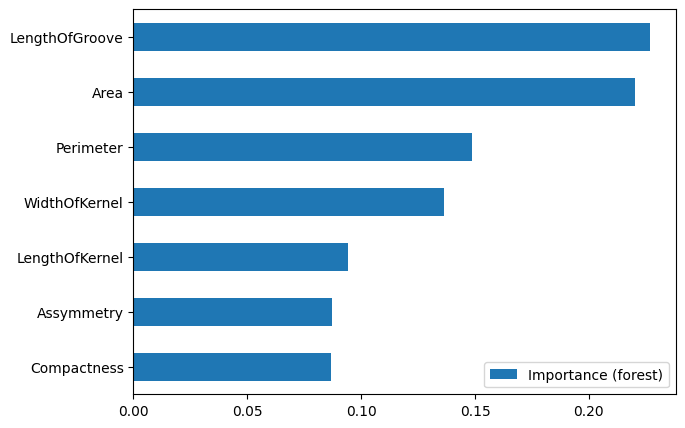

In [95]:
feature_importances_rf_df = pd.DataFrame(rf_model.feature_importances_,
                                           columns=['Importance (forest)'],
                                           index = X.columns).sort_values('Importance (forest)', ascending=True)
feature_importances_rf_df.plot.barh(figsize=(7,5))

In [96]:
X = df.drop(['ClassName','ClassID'],axis=1)
y = df['ClassID']-1


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [98]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(gamma = 2, max_depth = 7, n_estimators = 20)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [99]:
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.95      1.00      0.97        18
           2       0.95      1.00      0.97        18

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



<Axes: >

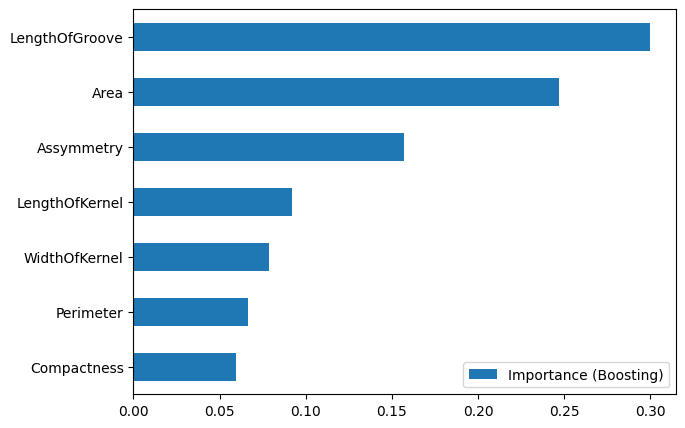

In [100]:
feature_importances_xgb_df = pd.DataFrame(xgb_model.feature_importances_,
                                           columns=['Importance (Boosting)'],
                                           index = X.columns).sort_values('Importance (Boosting)', ascending=True)
feature_importances_xgb_df.plot.barh(figsize=(7,5))